In [1]:
import pickle

In [2]:
distance_matrix_rtt = pickle.load(open('distance_matrix.pkl','rb'))

In [3]:
points = list(distance_matrix_rtt.keys())
distance_matrix = [[-1]*len(points) for _ in range(len(points))]

In [4]:
for p1 in points:
    distance_matrix[list(points).index(p1)][list(points).index(p1)] = 0
    for p2 in distance_matrix_rtt[p1].keys():
        distance_matrix[points.index(p1)][points.index(p2)] = distance_matrix_rtt[p1][p2]
        distance_matrix[points.index(p2)][points.index(p1)] = distance_matrix_rtt[p1][p2]

In [5]:
start_v = (19, 219)
end_v = (425, 3)

In [6]:
for idx, p in enumerate(points):
    if p.x == 19 and p.y == 219:
        start_p = idx
        print('start index: ', idx)
    if p.x == 425 and p.y == 3:
        end_p = idx
        print('end index: ', idx)

end index:  15
start index:  40


In [7]:
from dijkstras import dijkstras

In [8]:
algo = dijkstras(distance_matrix, start_p, end_p)

In [9]:
algo.calculate_dijkstras()

prior:  [40]
curr_node:  40
adj_node:  25
------------------
-- candidate_parent:  40
-- v:  25
-- new len:  83.45058418010026
-- old len:  inf
-- node_stack:  [25]
-- curr_node:  25
-- curr_node's children:  []
-----------------
adj_node:  36
------------------
-- candidate_parent:  40
-- v:  36
-- new len:  173.4877517290486
-- old len:  inf
-- node_stack:  [36]
-- curr_node:  36
-- curr_node's children:  []
-----------------
adj_node:  49
------------------
-- candidate_parent:  40
-- v:  49
-- new len:  45.65084884205331
-- old len:  inf
-- node_stack:  [49]
-- curr_node:  49
-- curr_node's children:  []
-----------------
adj_node:  78
------------------
-- candidate_parent:  40
-- v:  78
-- new len:  62.48199740725323
-- old len:  inf
-- node_stack:  [78]
-- curr_node:  78
-- curr_node's children:  []
-----------------
prior:  [25, 36, 49, 78]
curr_node:  78
adj_node:  13
------------------
-- candidate_parent:  78
-- v:  13
-- new len:  84.84267718225112
-- old len:  inf
-- node_

In [10]:
path = algo.get_shortestpath()

In [11]:
for p in path:
    print(list(points)[p])

(19, 219)
(59, 197)
(80, 10)
(155, 52)
(225, 68)
(254, 81)
(319, 67)
(340, 75)
(383, 43)
(414, 2)
(425, 3)


In [12]:
from PIL import Image
import numpy as np
im_1 = Image.open("Maze.jpeg")
matrix = np.array(im_1)
rgb_image = matrix

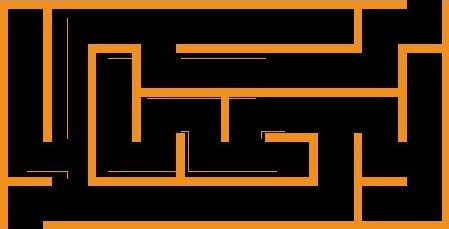

In [13]:
# import pickle
# res, image = pickle.load(open('../VIP/get_remoteAPI/v0output_maze.pkl', 'rb'))
# import numpy as np
# rgb_image = np.reshape(image, (res[0], res[1], 3))
# from PIL import Image
new_image = Image.fromarray(np.array(rgb_image, dtype=np.uint8))
new_image

In [14]:
# for p in path:
#     x = points[p].x
#     y = points[p].y
#     rgb_image[y][x] = (999,999,999)
# new_image = Image.fromarray(np.array(rgb_image, dtype=np.uint8))
# new_image

In [15]:
last_p = path[0]
for p in path[1:]:
    p1 = points[last_p]
    p2 = points[p]
    if p2.x != p1.x:
            if p1.x == 0:
                b = p1.y
                a = (p2.y-p1.y)/p2.x
            else:
                b = (p2.y*p1.x - p1.y*p2.x)/(p1.x-p2.x)
                a = (p1.y-b)/p1.x
#             rate = abs(p2.y-p1.y) / abs(p2.x-p1.x)
            for x in range(min(p1.x,p2.x), max(p1.x,p2.x)):
                y = int(a*x+b)
                if x < 449 and y < 229:
                    rgb_image[y][x] = (999,999,999)
    else:
        for y in range(min(p1.y,p2.y), min(p1.y,p2.y)):
            if y < 512:
                rgb_image[p1.x][y] = (999,999,999)
    last_p = p

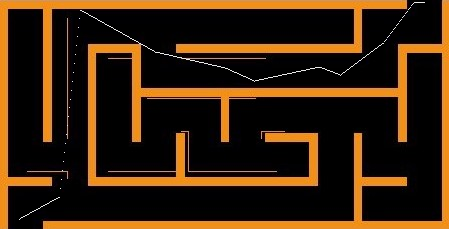

In [16]:
new_image = Image.fromarray(np.array(rgb_image, dtype=np.uint8))
new_image